**Artificial Vision Project**

**Car recognition and counting**

But before we start


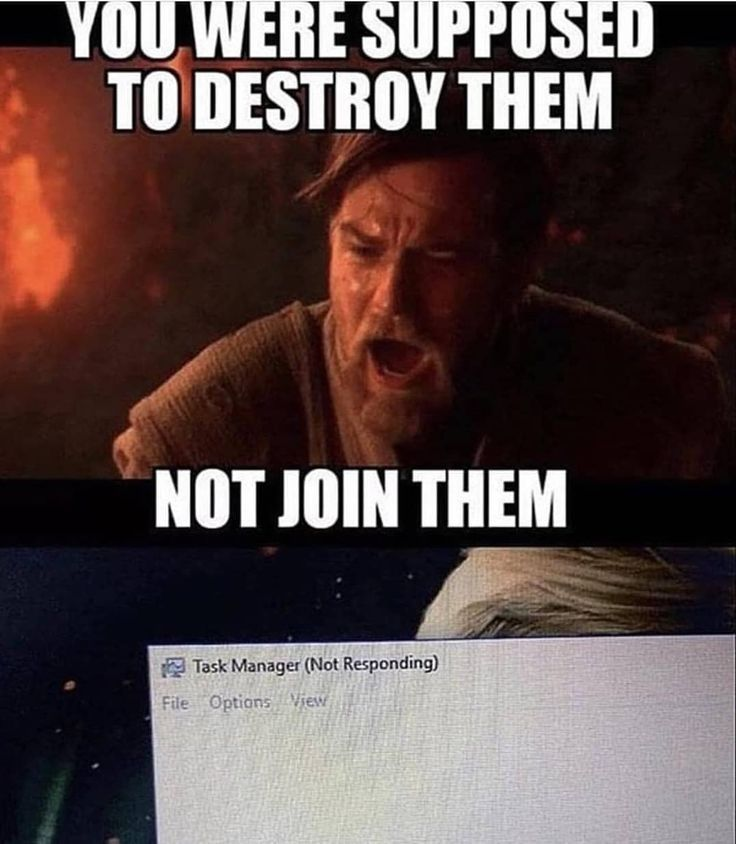

In [1]:
from IPython.display import Image
Image(filename='meme_inicial.jpg')

**Problem:**
As there is a great traffic congestion in the city, the project proposes to implement the recognition of cars and have them with the aim of applying an algorithm capable of optimally perform the decongestion of the city by changing the colors of the traffic lights.

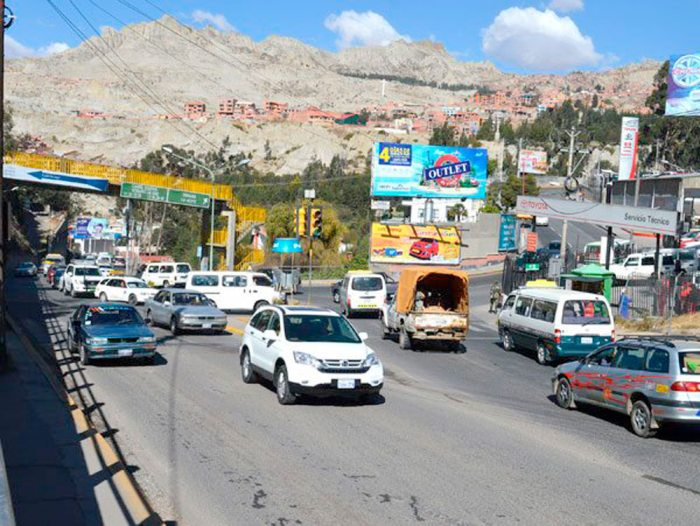

In [2]:
Image(filename='congestionamiento_vehicular.jpg')

**For this project we used 3 stages:**

1. Photos were taken to obtain a data set
2. The data set was trained by Cascade-Trainer-GUI

    [link to the application]{https://amin-ahmadi.com/cascade-trainer-gui/}
    
    
3. The XML file trained in code was applied

For the development of the code we used as a source of information videos 

1. [link first video]{https://www.youtube.com/watch?v=cZkpaL36fW4&ab_channel=OMES}

2. [link Second video]{https://www.youtube.com/watch?v=J1jlm-I1cTs&ab_channel=OME2}



**TOMA DE IMAGENES PARA EL DATA SET**

In [38]:
import cv2
import numpy as np
import imutils
import os

#CREATE FOLDER 
#POSITIVE: P
#NEGATIVE: N
Datos = 'n'
if not os.path.exists(Datos):
    print('Folder: ', Datos)
    os.makedirs(Datos)
# ACTIVATE THE CAMERA
cap = cv2.VideoCapture(0,cv2.CAP_DSHOW)
#CAPTURE FRAME
x1, y1 = 280, 150
x2, y2 = 350, 250

count = 0
while True:

    ret, frame = cap.read()
    if ret == False:  break
    # CREATE IMAGE CUTOUT
    imAux = frame.copy()
    cv2.rectangle(frame,(x1,y1),(x2,y2),(255,0,0),2)

    objeto = imAux[y1:y2,x1:x2]
    objeto = imutils.resize(objeto, width=38)
    # print(objeto.shape)

    k = cv2.waitKey(1)
    if k == ord('s'):
        cv2.imwrite(Datos+'/objeto_{}.jpg'.format(count),objeto)
        print('Imagen almacenada: ', 'objeto_{}.jpg'.format(count))
        count = count + 1
    if k == 27: 
        break
    if k == ord('q'):
        break
    cv2.imshow('frame',frame)
    cv2.imshow('objeto',objeto)

cap.release()
cv2.destroyAllWindows()

Folder:  n


**Como muestra de las imagenes tomadas se adjunta:**

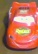

In [39]:
Image(filename='Image_ejem.jpg')


And as a negative image: the background if the

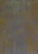

In [40]:
Image(filename='Image_ejem_negativo.jpg')

The previous code generates an image to train them, there are several modes, but in this case we used the application mentioned at the beginning of the tutorial

In [41]:
import cv2


cap = cv2.VideoCapture(0,cv2.CAP_DSHOW)
CarClassif = cv2.CascadeClassifier("cascade.xml")
while True:
    #frame = cap.imread()

    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    toy = CarClassif.detectMultiScale(frame,
    #image 1, at high values detection is lost, and low values can generate false positives
    # This pyramid is drawn to the size of the sample in order to detect them.
    scaleFactor = 150.1, # reduccion de imagen, a mayor imagen
    #minimum of box delimiters
    # very high values: detection decreases
    # very low values: false positives                             
    minNeighbors = 80,
    #Minimum size.
    minSize=(45,58),
    maxSize=(50,60))
    
    for (x,y,w,h) in toy:
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),2)
        cv2.putText(frame,'Car',(x,y-10),2,0.7,(0,255,0),2,cv2.LINE_AA)
        cv2.putText(frame,'numero de autos: '+str(len(toy)),(30,30),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        #cv2.putText(frame,len(toy),2)
    cv2.imshow('frame',frame)
    k = cv2.waitKey(1)
    if k == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In the following code try changing the test images: Test_# and interact with scaleFactor and minNeigbors

In [7]:
import cv2

CarClassif = cv2.CascadeClassifier("cascade.xml")
#hasta Prueba 4.
image = cv2.imread('Prueba_2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 

toy = CarClassif.detectMultiScale(image,
#image 1, at high values detection is lost, and low values can generate false positives
# This pyramid is drawn to the size of the sample in order to detect them.
scaleFactor = 550.1, # image reduction, the larger the image
#minimum of box delimiters
# very high values: detection decreases
# very low values: false positives                             
minNeighbors = 300,
#minimun size
minSize=(45,58),
maxSize=(50,60))
    
for (x,y,w,h) in toy:
    cv2.rectangle(image, (x,y),(x+w,y+h),(0,255,0),2)
    cv2.putText(image,'Car',(x,y-10),2,0.7,(0,255,0),2,cv2.LINE_AA)
    cv2.putText(image,'numero de autos: '+str(len(toy)),(30,30),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    #cv2.putText(frame,len(toy),2)
    #cv2.imshow('frame',frame)
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()